In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
%matplotlib inline

In [4]:
data1=pd.read_csv('gossipcop_fake.csv')  #load fake dataset(to change)

In [5]:
data2=pd.read_csv('gossipcop_real.csv')#load real dataset(to change)

In [6]:
data1.drop(['id','news_url','tweet_ids'],inplace=True,axis=1)#(to change)

In [7]:
data2.drop(['id','news_url','tweet_ids'],inplace=True,axis=1)#(to change)

In [8]:
data1['tag']=0 #fake #(to change)

In [9]:
data2['tag']=1  #real(to change)

In [10]:
data2

,title,tag
0,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,1
1,Kylie Jenner refusing to discuss Tyga on Life ...,1
2,Quinn Perkins,1
3,I Tried Kim Kardashian's Butt Workout & Am For...,1
4,Celine Dion donates concert proceeds to Vegas ...,1
...,...,...
16812,2017 Hollywood Film Awards: The Complete List ...,1
16813,Jada Pinkett Smith explains why son Jaden move...,1
16814,Tinsley Mortimer Reacts to Luann de Lesseps' R...,1
16815,Prince Harry Carries on Princess Diana’s Legac...,1


In [9]:
data_train=data1[:4000].append(data2[:12000])    #creating the train data by including 4000 from fake and 12000 from real #(to change)

In [10]:
data_train

,title,tag
0,Did Miley Cyrus and Liam Hemsworth secretly ge...,0
1,Paris Jackson & Cara Delevingne Enjoy Night Ou...,0
2,Celebrities Join Tax March in Protest of Donal...,0
3,Cindy Crawford's daughter Kaia Gerber wears a ...,0
4,Full List of 2018 Oscar Nominations – Variety,0
...,...,...
11995,Natalie Maines files for divorce after 17 years,1
11996,"Janelle Monae's ""PYNK"" Video Teaches an Accura...",1
11997,Gwyneth Paltrow and Brad Falchuk Confirm Their...,1
11998,Alicia Silverstone and Breckin Meyer Are Anyth...,1


In [11]:
data_train['tag'].value_counts()    # consists of 12000 real and 4000 fake dataset

1    12000
0     4000
Name: tag, dtype: int64

In [12]:
data_test=data1[4000:].append(data2[12000:])

In [13]:
data_test  #(to change)

,title,tag
4000,Robert Pattinson & Kristen Stewart Would ‘Love...,0
4001,15 Women Brad Pitt Has Surprisingly Been Linke...,0
4002,Taylor Swift Wants To Reconcile Her Romance Wi...,0
4003,Khloe Kardashian Has Spent Over $3 Million For...,0
4004,Brad Pitt’s Hurricane Katrina homes are fallin...,0
...,...,...
16812,2017 Hollywood Film Awards: The Complete List ...,1
16813,Jada Pinkett Smith explains why son Jaden move...,1
16814,Tinsley Mortimer Reacts to Luann de Lesseps' R...,1
16815,Prince Harry Carries on Princess Diana’s Legac...,1


In [14]:
len(data_train["title"][0])

2

In [15]:
data_train['len']=data_train['title'].apply(lambda x: len(x))

In [16]:
data_train

,title,tag,len
0,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,56
1,Paris Jackson & Cara Delevingne Enjoy Night Ou...,0,98
2,Celebrities Join Tax March in Protest of Donal...,0,53
3,Cindy Crawford's daughter Kaia Gerber wears a ...,0,80
4,Full List of 2018 Oscar Nominations – Variety,0,45
...,...,...,...
11995,Natalie Maines files for divorce after 17 years,1,47
11996,"Janelle Monae's ""PYNK"" Video Teaches an Accura...",1,73
11997,Gwyneth Paltrow and Brad Falchuk Confirm Their...,1,85
11998,Alicia Silverstone and Breckin Meyer Are Anyth...,1,90


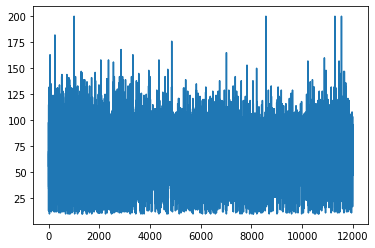

In [17]:
data_train.len.plot()

In [18]:
import re
import string 
from nltk import word_tokenize
from nltk.corpus import stopwords


def clean_data(text):  #function to remove punctuatuions, tokenize the text and lower the text and remove stopwords
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)  #no pinctations
    tokens = word_tokenize(text_nopunct)                       #convert into tokens
    lower_tokens=[x.lower() for x in tokens]                     #lowercase the tokens
    stoplist = stopwords.words('english')
    tokens_without_sw=[word for word in lower_tokens if not word in stopwords.words()]
    text_final=' '.join(tokens_without_sw) 
    return text_final
    
    
    

In [19]:
data_train['text_Final'] = data_train['title'].apply(lambda x: clean_data(x)) #claeaning the trAINING SET

In [20]:
data_test['Text_Final']=data_test['title'].apply(lambda x: clean_data(x))#claeaning the TESTING SET

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
def make_tokens(text):
    return word_tokenize(text)
#TOKENIZING THE CLEANED DATA

In [23]:
data_train['tokens']=data_train['text_Final'].apply(lambda x: make_tokens(x))

In [24]:
data_test['tokens']=data_test['Text_Final'].apply(lambda x: make_tokens(x))

In [25]:
y_train=data_train['tag'].values    #GETTING THE RESULT VALUES TO TRAIN ON
y_test=data_test['tag'].values

In [26]:
from gensim import models

In [27]:
word2vec_path = 'GoogleNews-vectors-negative300.bin.gz'
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [2]:
all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

NameError: name 'data_train' is not defined

In [98]:
sum(training_sentence_lengths)/16000

8.3959375

In [1]:
MAX_SEQUENCE_LENGTH=20   #number of words in a paragraph  #(to change) according to question
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train['text_Final'].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train['text_Final'].tolist())
train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))
train_cnn_data = pad_sequences(training_sequences, 
                               maxlen=MAX_SEQUENCE_LENGTH)##trining data ready

NameError: name 'TRAINING_VOCAB' is not defined

In [100]:
all_testing_words = [word for tokens in data_test["tokens"] for word in tokens]
testing_sentence_lengths = [len(tokens) for tokens in data_test["tokens"]]
TESTING_VOCAB = sorted(list(set(all_testing_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_testing_words), len(TESTING_VOCAB)))
print("Max sentence length is %s" % max(testing_sentence_lengths))

51628 words total, with a vocabulary size of 10114
Max sentence length is 24


In [101]:
#MAX_SEQUENCE_LENGTH=20
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)#test_data ready

In [102]:
EMBEDDING_DIM=300
train_embedding_weights = np.zeros((len(train_word_index)+1, 
 EMBEDDING_DIM))
for word,index in train_word_index.items():
 train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(15763, 300)


In [103]:
from __future__ import print_function
from tensorflow.keras.layers import Embedding

from tensorflow.keras.preprocessing.text import text_to_word_sequence
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np


from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten,Bidirectional,GRU,LSTM,SpatialDropout1D,Reshape
from tensorflow.keras.layers import Embedding,concatenate
from tensorflow.keras.layers import Conv2D, GlobalMaxPooling2D,MaxPool2D,MaxPool3D,GlobalAveragePooling2D,Conv3D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [106]:
filter_sizes = [1,2,3,4]
num_filters = 32
embed_size=300
embedding_matrix=train_embedding_weights
max_features=len(train_word_index)+1
maxlen=MAX_SEQUENCE_LENGTH  #takin max length of para as 20 and then converintg to 5 cross 4
def get_model():    
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
    x = SpatialDropout1D(0.4)(x)
    x = Reshape((5, 4, 300))(x)
    print(x)
    conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], 2), activation='relu')(x)
    conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], 2), activation='relu')(x)
    conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], 2), activation='relu')(x)
    conv_3 = Conv2D(num_filters, kernel_size=(filter_sizes[3], 2), activation='relu')(x)
    
    maxpool_0 = MaxPool2D()(conv_0)
    maxpool_1 = MaxPool2D()(conv_1)
    maxpool_2 = MaxPool2D()(conv_2)
    maxpool_3 = MaxPool2D()(conv_3)
        
    z = concatenate([maxpool_0, maxpool_1, maxpool_2, maxpool_3],axis=1)
    z = Flatten()(z)
    z = Dropout(0.1)(z)
        
    outp = Dense(1, activation="sigmoid")(z)
    
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model


In [107]:
model=get_model()

Tensor("reshape_18/Identity:0", shape=(None, 5, 4, 300), dtype=float32)


In [108]:
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding_18 (Embedding)        (None, 20, 300)      4728900     input_19[0][0]                   
__________________________________________________________________________________________________
spatial_dropout1d_18 (SpatialDr (None, 20, 300)      0           embedding_18[0][0]               
__________________________________________________________________________________________________
reshape_18 (Reshape)            (None, 5, 4, 300)    0           spatial_dropout1d_18[0][0]       
____________________________________________________________________________________________

In [109]:

#define callbacks
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks_list = [early_stopping]
hist = model.fit(train_cnn_data, y_train,  epochs=10,callbacks=callbacks_list,batch_size=32,validation_split=0.1 )

Train on 14400 samples, validate on 1600 samples
Epoch 1/10
14400/14400 [==============================] - 41s 3ms/sample - loss: 0.5156 - accuracy: 0.7550 - val_loss: 0.2641 - val_accuracy: 0.9312
Epoch 2/10
14400/14400 [==============================] - 41s 3ms/sample - loss: 0.3897 - accuracy: 0.8260 - val_loss: 0.2762 - val_accuracy: 0.9056
Epoch 3/10
14400/14400 [==============================] - 40s 3ms/sample - loss: 0.3024 - accuracy: 0.8702 - val_loss: 0.2660 - val_accuracy: 0.8925
Epoch 4/10
14400/14400 [==============================] - 40s 3ms/sample - loss: 0.2316 - accuracy: 0.9053 - val_loss: 0.2844 - val_accuracy: 0.8831
Epoch 5/10
14400/14400 [==============================] - 40s 3ms/sample - loss: 0.1658 - accuracy: 0.9332 - val_loss: 0.3848 - val_accuracy: 0.8475
Epoch 00005: early stopping


In [110]:
pred=model.predict(test_cnn_data)    
y_test=pred
y_test=y_test.tolist()
output_class_pred=[]
for i in range(len(y_test)):   #creaing the predicted class array
    if(y_test[i][0]<0.5):
        output_class_pred.append(0)
    else:
        output_class_pred.append(1)
        
original_ans=data_test['tag']
original_ans=original_ans.tolist()

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [112]:

def check_metric(output_class_pred,original_ans):
    rightly_predicted=0
    
    for i in range(len(y_test)):
        if(original_ans[i]==output_class_pred[i]):
            rightly_predicted+=1
        
        
    print("Overall_acuracy:",rightly_predicted/len(output_class_pred))
    print('TP',TP)
    accuracy=rightly_predicted/len(y_test)
    print(classification_report(original_ans,output_class_pred))
    print(confusion_matrix(original_ans,output_class_pred))
    TN=confusion_matrix(original_ans,output_class_pred)[0][0]
    TP=confusion_matrix(original_ans,output_class_pred)[1][1]
    FP=confusion_matrix(original_ans,output_class_pred)[0][1]
    FN=confusion_matrix(original_ans,output_class_pred)[1][0]
    
    precision=TP/(TP+FP)
    recalll=TP/(FN+TP)
    F1=2*precision*recalll/(precision+recalll)
    sensiti=TP/(TP+FN)
    specifici=TN/(TN+FP)
    numerator=TP*TN - FP*FN
    
    denominator=np.sqrt((TP+FP)*(FN+TN)*(FP+TN)* (TP+FN))
    MCc=numerator/denominator
    G_mean1=np.sqrt(sensiti*precision)
    G_mean2=np.sqrt(sensiti*specifici)
    print('precision:' ,TP/(TP+FP))
    print('recall:',TP/(FN+TP))
    print("F1:",F1)
    print("Specificity:",TN/(TN+FP))
    print("Sensitivity ",TP/(TP+FN))
    print('G-mean1:',np.sqrt(sensiti*precision))
    print("G-mean2",np.sqrt(sensiti*specifici))
    print("MCC :",MCc)
    acc=[]
    pre=[]
    recall=[]
    f1=[]
    specificity=[]
    sensitivity=[]
    GMean1=[]
    Gmean2=[]
    MCC=[]
    tp=[]
    fp=[]
    fn=[]
    tn=[]
    acc.append(accuracy)
    pre.append(precision)
    recall.append(recalll)
    f1.append(F1)
    specificity.append(specifici)
    sensitivity.append(sensiti)
    GMean1.append(G_mean1)
    Gmean2.append(G_mean2)
    MCC.append(MCc)
    tp.append(TP)
    fp.append(FP)
    tn.append(TN)
    fn.append(FN)
    data={'accuracy_all':acc,"precision":pre,'recall':recall,'F1_score':f1,'specificity':specificity,'sensitivity':sensitivity,'Gmean1':GMean1,"Gmean2":Gmean2,"MCC":MCC,"TP":tp,"FP":fp,"TN":tn,"FN":fn}
    metric=pd.DataFrame(data)
    return metric
    
    
    

In [113]:
resi=check_metric(output_class_pred,original_ans)

Overall_acuracy: 0.8009771986970684
TP 0
              precision    recall  f1-score   support

           0       0.53      0.62      0.57      1323
           1       0.89      0.85      0.87      4817

    accuracy                           0.80      6140
   macro avg       0.71      0.73      0.72      6140
weighted avg       0.81      0.80      0.81      6140

[[ 818  505]
 [ 717 4100]]
precision: 0.8903365906623235
recall: 0.8511521694000416
F1: 0.8703035448949269
Specificity: 0.618291761148904
Sensitivity  0.8511521694000416
G-mean1: 0.8705239345580761
G-mean2 0.7254380565038355
MCC : 0.4457413935598297


In [ ]:
#THE BELOW CODE WILL PREPARE A RESULTS.CSV FILE IN YOUR DIRECTORY

In [114]:
resi.to_csv('results.csv', mode='w', index = False, header=resi.columns,columns=resi.columns)

In [138]:
model.save('GOSSIP_mod1.h5')

In [ ]:
#MODEL 2.   CAN BE CHANGED BY CHANGING THE FILTER SIZES

In [115]:
filter_sizes = [1,2,3,4]
num_filters = 32
embed_size=300
embedding_matrix=train_embedding_weights
max_features=len(train_word_index)+1
maxlen=MAX_SEQUENCE_LENGTH
def get_model():    
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
    x = SpatialDropout1D(0.4)(x)
    x = Reshape((5, 4, 300))(x)
    #print(x)
    conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], 2), 
                                                                                    activation='relu')(x)
    conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], 2),
                                                                                    activation='relu')(x)
    conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], 2), 
                                                                                    activation='relu')(x)
   
    
    
    conv_4 = Conv2D(num_filters, kernel_size=(filter_sizes[0], 1), 
                                                                                    activation='relu')(x)
    conv_5 = Conv2D(num_filters, kernel_size=(filter_sizes[0], 2), 
activation='elu')(x)
    conv_6 = Conv2D(num_filters, kernel_size=(filter_sizes[0], 3), activation='relu')(x)
    
    
    
    maxpool_0 = MaxPool2D()(conv_0)
    maxpool_1 = MaxPool2D()(conv_1)
    maxpool_2 = MaxPool2D()(conv_2)
    #maxpool_3 = MaxPool2D()(conv_3)
    
    maxpool_4 = MaxPool2D()(conv_4)
    maxpool_4=Flatten()(maxpool_4)
    maxpool_5 = MaxPool2D()(conv_5)
    maxpool_5=Flatten()(maxpool_5)
    maxpool_6 = MaxPool2D()(conv_6)
    maxpool_6=Flatten()(maxpool_6)
    #maxpool_7 = MaxPool2D()(conv_7)
   # maxpool_7=Flatten()(maxpool_7)
        
    w=concatenate([maxpool_4, maxpool_5, maxpool_6],axis=1)    
    z = concatenate([maxpool_0, maxpool_1, maxpool_2],axis=1)
    
    z = Flatten()(z)
    z=concatenate([w,z],axis=1)
    z=Dense(units=128,activation="relu")(z)
    z = Dropout(0.1)(z)
        
    outp = Dense(1, activation="sigmoid")(z)
    
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

    return model


In [116]:
model2=get_model()

In [117]:
model2.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding_19 (Embedding)        (None, 20, 300)      4728900     input_20[0][0]                   
__________________________________________________________________________________________________
spatial_dropout1d_19 (SpatialDr (None, 20, 300)      0           embedding_19[0][0]               
__________________________________________________________________________________________________
reshape_19 (Reshape)            (None, 5, 4, 300)    0           spatial_dropout1d_19[0][0]       
___________________________________________________________________________________________

In [118]:

#define callbacks
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks_list = [early_stopping]
hist = model2.fit(train_cnn_data, y_train,  epochs=10,callbacks=callbacks_list,batch_size=32,validation_split=0.1 )

Train on 14400 samples, validate on 1600 samples
Epoch 1/10
14400/14400 [==============================] - 43s 3ms/sample - loss: 0.5080 - accuracy: 0.7628 - val_loss: 0.3490 - val_accuracy: 0.8938
Epoch 2/10
14400/14400 [==============================] - 43s 3ms/sample - loss: 0.3648 - accuracy: 0.8408 - val_loss: 0.2709 - val_accuracy: 0.8906
Epoch 3/10
14400/14400 [==============================] - 44s 3ms/sample - loss: 0.2645 - accuracy: 0.8887 - val_loss: 0.2736 - val_accuracy: 0.8875
Epoch 4/10
14400/14400 [==============================] - 46s 3ms/sample - loss: 0.1810 - accuracy: 0.9269 - val_loss: 0.2837 - val_accuracy: 0.8825
Epoch 5/10
14400/14400 [==============================] - 44s 3ms/sample - loss: 0.1270 - accuracy: 0.9503 - val_loss: 0.3090 - val_accuracy: 0.8775
Epoch 6/10
14400/14400 [==============================] - 43s 3ms/sample - loss: 0.0956 - accuracy: 0.9619 - val_loss: 0.3221 - val_accuracy: 0.8906
Epoch 00006: early stopping


In [121]:
pred=model2.predict(test_cnn_data)
y_test=pred
y_test=y_test.tolist()
output_class_pred=[]
for i in range(len(y_test)):
    if(y_test[i][0]<0.5):
        output_class_pred.append(0)
    else:
        output_class_pred.append(1)
        
original_ans=data_test['tag']
original_ans=original_ans.tolist()

In [122]:
#as its a fake news classifier , so identifying a fake class will be a TP
def check_metric(output_class_pred,original_ans):
    rightly_predicted=0
    TP=0
    for i in range(len(y_test)):
        if(original_ans[i]==output_class_pred[i]):
            rightly_predicted+=1
        
        
    print("Overall_acuracy:",rightly_predicted/len(output_class_pred))
    print('TP',TP)
    accuracy=rightly_predicted/len(y_test)
    print(classification_report(original_ans,output_class_pred))
    print(confusion_matrix(original_ans,output_class_pred))
    TN=confusion_matrix(original_ans,output_class_pred)[0][0]
    TP=confusion_matrix(original_ans,output_class_pred)[1][1]
    FP=confusion_matrix(original_ans,output_class_pred)[0][1]
    FN=confusion_matrix(original_ans,output_class_pred)[1][0]
    
    precision=TP/(TP+FP)
    recalll=TP/(FN+TP)
    F1=2*precision*recalll/(precision+recalll)
    sensiti=TP/(TP+FN)
    specifici=TN/(TN+FP)
    numerator=TP*TN - FP*FN
    
    denominator=np.sqrt((TP+FP)*(FN+TN)*(FP+TN)* (TP+FN))
    MCc=numerator/denominator
    G_mean1=np.sqrt(sensiti*precision)
    G_mean2=np.sqrt(sensiti*specifici)
    print('precision:' ,TP/(TP+FP))
    print('recall:',TP/(FN+TP))
    print("F1:",F1)
    print("Specificity:",TN/(TN+FP))
    print("Sensitivity ",TP/(TP+FN))
    print('G-mean1:',np.sqrt(sensiti*precision))
    print("G-mean2",np.sqrt(sensiti*specifici))
    print("MCC :",MCc)
    acc=[]
    pre=[]
    recall=[]
    f1=[]
    specificity=[]
    sensitivity=[]
    GMean1=[]
    Gmean2=[]
    MCC=[]
    tp=[]
    fp=[]
    fn=[]
    tn=[]
    acc.append(accuracy)
    pre.append(precision)
    recall.append(recalll)
    f1.append(F1)
    specificity.append(specifici)
    sensitivity.append(sensiti)
    GMean1.append(G_mean1)
    Gmean2.append(G_mean2)
    MCC.append(MCc)
    tp.append(TP)
    fp.append(FP)
    tn.append(TN)
    fn.append(FN)
    data={'accuracy_all':acc,"precision":pre,'recall':recall,'F1_score':f1,'specificity':specificity,'sensitivity':sensitivity,'Gmean1':GMean1,"Gmean2":Gmean2,"MCC":MCC,"TP":tp,"FP":fp,"TN":tn,"FN":fn}
    metric=pd.DataFrame(data)
    return metric
    
    
    

In [123]:
resi=check_metric(output_class_pred,original_ans)

Overall_acuracy: 0.8214983713355049
TP 0
              precision    recall  f1-score   support

           0       0.59      0.56      0.58      1323
           1       0.88      0.89      0.89      4817

    accuracy                           0.82      6140
   macro avg       0.74      0.73      0.73      6140
weighted avg       0.82      0.82      0.82      6140

[[ 747  576]
 [ 520 4297]]
precision: 0.8817976605786989
recall: 0.892048993149263
F1: 0.8868937048503611
Specificity: 0.564625850340136
Sensitivity  0.892048993149263
G-mean1: 0.8869085157335022
G-mean2 0.7096998811483378
MCC : 0.463968846698055


In [124]:
resi.to_csv('results.csv', mode='w', index = False, header=resi.columns,columns=resi.columns)

In [139]:
model2.save('GOSSIP_mod2.h5')

In [125]:
from __future__ import print_function
from tensorflow.keras.layers import Embedding

from tensorflow.keras.preprocessing.text import text_to_word_sequence
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np


from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten,Bidirectional,GRU,LSTM
from tensorflow.keras.layers import Embedding,concatenate
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D,MaxPooling1D,GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [126]:
train_y=pd.get_dummies(y_train)

In [127]:
trains_y=train_y[[0,1]].values

In [129]:


embed_size=300
embedding_matrix=train_embedding_weights
max_features=len(train_word_index)+1
maxlen=20 #(MAX_SEQUENCE_LENGTH)
max_sequence_length=20
EMBEDDING_DIM=300


#model3 yoon kim

In [130]:
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, trainable=True, extra_conv=False):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    convs = []
    filter_sizes = [3,4,5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=100, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=2)(l_conv)
        convs.append(l_pool)

    l_merge = concatenate(convs, axis=1)

    # add a 1D convnet with global maxpooling, instead of Yoon Kim model
    #conv = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    #pool = MaxPooling1D(pool_size=2)(conv)

    #if extra_conv==True:
        #x = Dropout(0.01)(l_merge)  
    #else:
        # Original Yoon Kim model
        #x = Dropout(0.001)(pool)
    x = Flatten()(l_merge)
    
    x = Dropout(0.5)(x)
    # Finally, we feed the output into a Sigmoid layer.
    # The reason why sigmoid is used is because we are trying to achieve a binary classification(1,0) 
    # for each of the 6 labels, and the sigmoid function will squash the output between the bounds of 0 and 1.
    preds = Dense(2, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model

In [131]:
x_train = train_cnn_data
y_tr = y_train

In [132]:
model3 = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 
                 True)

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding_20 (Embedding)        (None, 20, 300)      4728900     input_21[0][0]                   
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 18, 100)      90100       embedding_20[0][0]               
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 17, 100)      120100      embedding_20[0][0]               
___________________________________________________________________________________________

In [133]:

#define callbacks
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks_list = [early_stopping]
hist = model3.fit(train_cnn_data, trains_y,  epochs=10,callbacks=callbacks_list,batch_size=32,validation_split=0.1 )

Train on 14400 samples, validate on 1600 samples
Epoch 1/10
14400/14400 [==============================] - 51s 4ms/sample - loss: 0.4901 - acc: 0.7756 - val_loss: 0.2386 - val_acc: 0.9275
Epoch 2/10
14400/14400 [==============================] - 47s 3ms/sample - loss: 0.3158 - acc: 0.8641 - val_loss: 0.2725 - val_acc: 0.8875
Epoch 3/10
14400/14400 [==============================] - 45s 3ms/sample - loss: 0.1980 - acc: 0.9197 - val_loss: 0.2276 - val_acc: 0.9106
Epoch 4/10
14400/14400 [==============================] - 44s 3ms/sample - loss: 0.1189 - acc: 0.9549 - val_loss: 0.2924 - val_acc: 0.8956
Epoch 5/10
14400/14400 [==============================] - 47s 3ms/sample - loss: 0.0819 - acc: 0.9712 - val_loss: 0.4134 - val_acc: 0.8731
Epoch 6/10
14400/14400 [==============================] - 43s 3ms/sample - loss: 0.0565 - acc: 0.9805 - val_loss: 0.4986 - val_acc: 0.8694
Epoch 7/10
14400/14400 [==============================] - 45s 3ms/sample - loss: 0.0528 - acc: 0.9840 - val_loss: 0.4

In [ ]:
# here forming th predicted array is little differnt (we calculate the argmax from pred and append into outpu accordingly)

In [134]:
pred=model3.predict(test_cnn_data)
y_test=pred
y_test=y_test.tolist()
output_class_pred=[]
#output_class_pred=[]
for i in range(len(y_test)):
    m=max(y_test[i])
    if(y_test[i].index(m)==0):
        output_class_pred.append(0)
    else:
        output_class_pred.append(1)
        
        
original_ans=data_test['tag']
original_ans=original_ans.tolist()

In [135]:
#as its a fake news classifier , so identifying a fake class will be a TP
def check_metric(output_class_pred,original_ans):
    rightly_predicted=0
    TP=0
    for i in range(len(y_test)):
        if(original_ans[i]==output_class_pred[i]):
            rightly_predicted+=1
        
        
    print("Overall_acuracy:",rightly_predicted/len(output_class_pred))
    print('TP',TP)
    accuracy=rightly_predicted/len(y_test)
    print(classification_report(original_ans,output_class_pred))
    print(confusion_matrix(original_ans,output_class_pred))
    TN=confusion_matrix(original_ans,output_class_pred)[0][0]
    TP=confusion_matrix(original_ans,output_class_pred)[1][1]
    FP=confusion_matrix(original_ans,output_class_pred)[0][1]
    FN=confusion_matrix(original_ans,output_class_pred)[1][0]
    
    precision=TP/(TP+FP)
    recalll=TP/(FN+TP)
    F1=2*precision*recalll/(precision+recalll)
    sensiti=TP/(TP+FN)
    specifici=TN/(TN+FP)
    numerator=TP*TN - FP*FN
    
    denominator=np.sqrt((TP+FP)*(FN+TN)*(FP+TN)* (TP+FN))
    MCc=numerator/denominator
    G_mean1=np.sqrt(sensiti*precision)
    G_mean2=np.sqrt(sensiti*specifici)
    print('precision:' ,TP/(TP+FP))
    print('recall:',TP/(FN+TP))
    print("F1:",F1)
    print("Specificity:",TN/(TN+FP))
    print("Sensitivity ",TP/(TP+FN))
    print('G-mean1:',np.sqrt(sensiti*precision))
    print("G-mean2",np.sqrt(sensiti*specifici))
    print("MCC :",MCc)
    acc=[]
    pre=[]
    recall=[]
    f1=[]
    specificity=[]
    sensitivity=[]
    GMean1=[]
    Gmean2=[]
    MCC=[]
    tp=[]
    fp=[]
    fn=[]
    tn=[]
    acc.append(accuracy)
    pre.append(precision)
    recall.append(recalll)
    f1.append(F1)
    specificity.append(specifici)
    sensitivity.append(sensiti)
    GMean1.append(G_mean1)
    Gmean2.append(G_mean2)
    MCC.append(MCc)
    tp.append(TP)
    fp.append(FP)
    tn.append(TN)
    fn.append(FN)
    data={'accuracy_all':acc,"precision":pre,'recall':recall,'F1_score':f1,'specificity':specificity,'sensitivity':sensitivity,'Gmean1':GMean1,"Gmean2":Gmean2,"MCC":MCC,"TP":tp,"FP":fp,"TN":tn,"FN":fn}
    metric=pd.DataFrame(data)
    return metric
    
    
    

In [136]:
resi=check_metric(output_class_pred,original_ans)

Overall_acuracy: 0.8201954397394137
TP 0
              precision    recall  f1-score   support

           0       0.58      0.60      0.59      1323
           1       0.89      0.88      0.88      4817

    accuracy                           0.82      6140
   macro avg       0.73      0.74      0.74      6140
weighted avg       0.82      0.82      0.82      6140

[[ 789  534]
 [ 570 4247]]
precision: 0.8883078853796277
recall: 0.8816690886443844
F1: 0.8849760366743071
Specificity: 0.5963718820861678
Sensitivity  0.8816690886443844
G-mean1: 0.8849822618212619
G-mean2 0.7251225094920498
MCC : 0.47343925526801317


In [137]:
resi.to_csv('results.csv', mode='w', index = False, header=resi.columns,columns=resi.columns)

In [140]:
model3.save('GOSSIP_Yoonkim.h5')